In [12]:
import muon as mu
import scanpy as sc
from mudata import MuData
from plot import plot_paired_umap
import os

In [13]:
concat_adata = sc.read_h5ad("results/AD.h5mu/1_False_30000_0.00015_v1.0/AD.h5mu/concat.h5ad")
concat_adata

AnnData object with n_obs × n_vars = 210664 × 128
    obs: 'rna:cell_type', 'atac:cell_type', 'cell_type', 'modality'

/home/zyuan/.local/share/virtualenvs/scCLIPenvs-NuI542pl/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zyuan/.local/share/virtualenvs/scCLIPenvs-NuI542pl/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


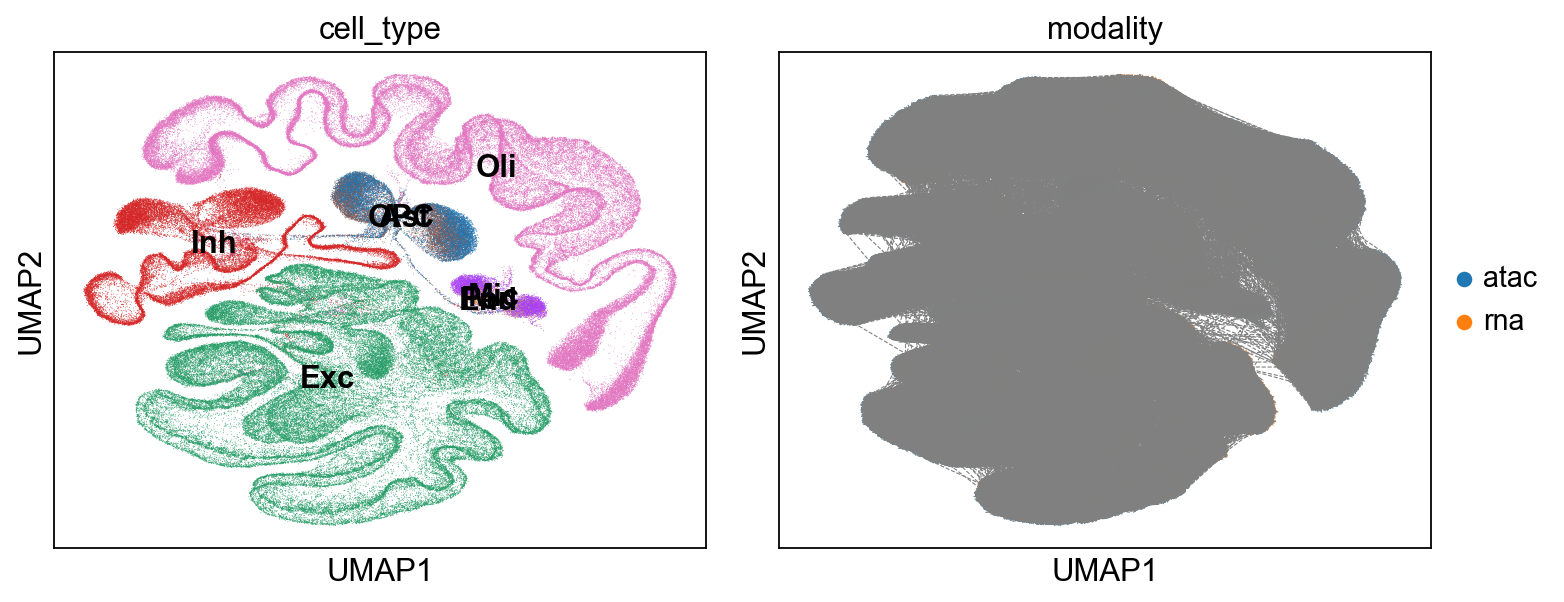

In [14]:
out_dir = "images/AD"
plot_paired_umap(concat_adata, color="cell_type", save=os.path.join(out_dir, 'umap_concat.png'))

In [2]:
rna_adata = sc.read_h5ad("results/AD.h5mu/1_False_30000_0.00015_v1.0/AD.h5mu/rna.h5ad")
atac_adata = sc.read_h5ad("results/AD.h5mu/1_False_30000_0.00015_v1.0/AD.h5mu/atac.h5ad")

In [3]:
def plot_umap(
        adata,
        color=None,
        save=None,
        n_neighbors=30,
        min_dist=0.5,
        metric="euclidean",
        use_rep="X",
        **pl_kwargs,
        ):
    sc.settings.set_figure_params(
        dpi=200, facecolor="white", figsize=(4, 4), frameon=True
    )
    sc.pp.neighbors(
        adata, metric=metric, use_rep=use_rep
    )
    sc.tl.leiden(
        adata
    )
    sc.tl.umap(adata)

    sc.pl.umap(
        adata, color=color, save=save, wspace=0.65, ncols=4, show=True, **pl_kwargs
    )

/home/zyuan/.local/share/virtualenvs/scCLIPenvs-NuI542pl/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


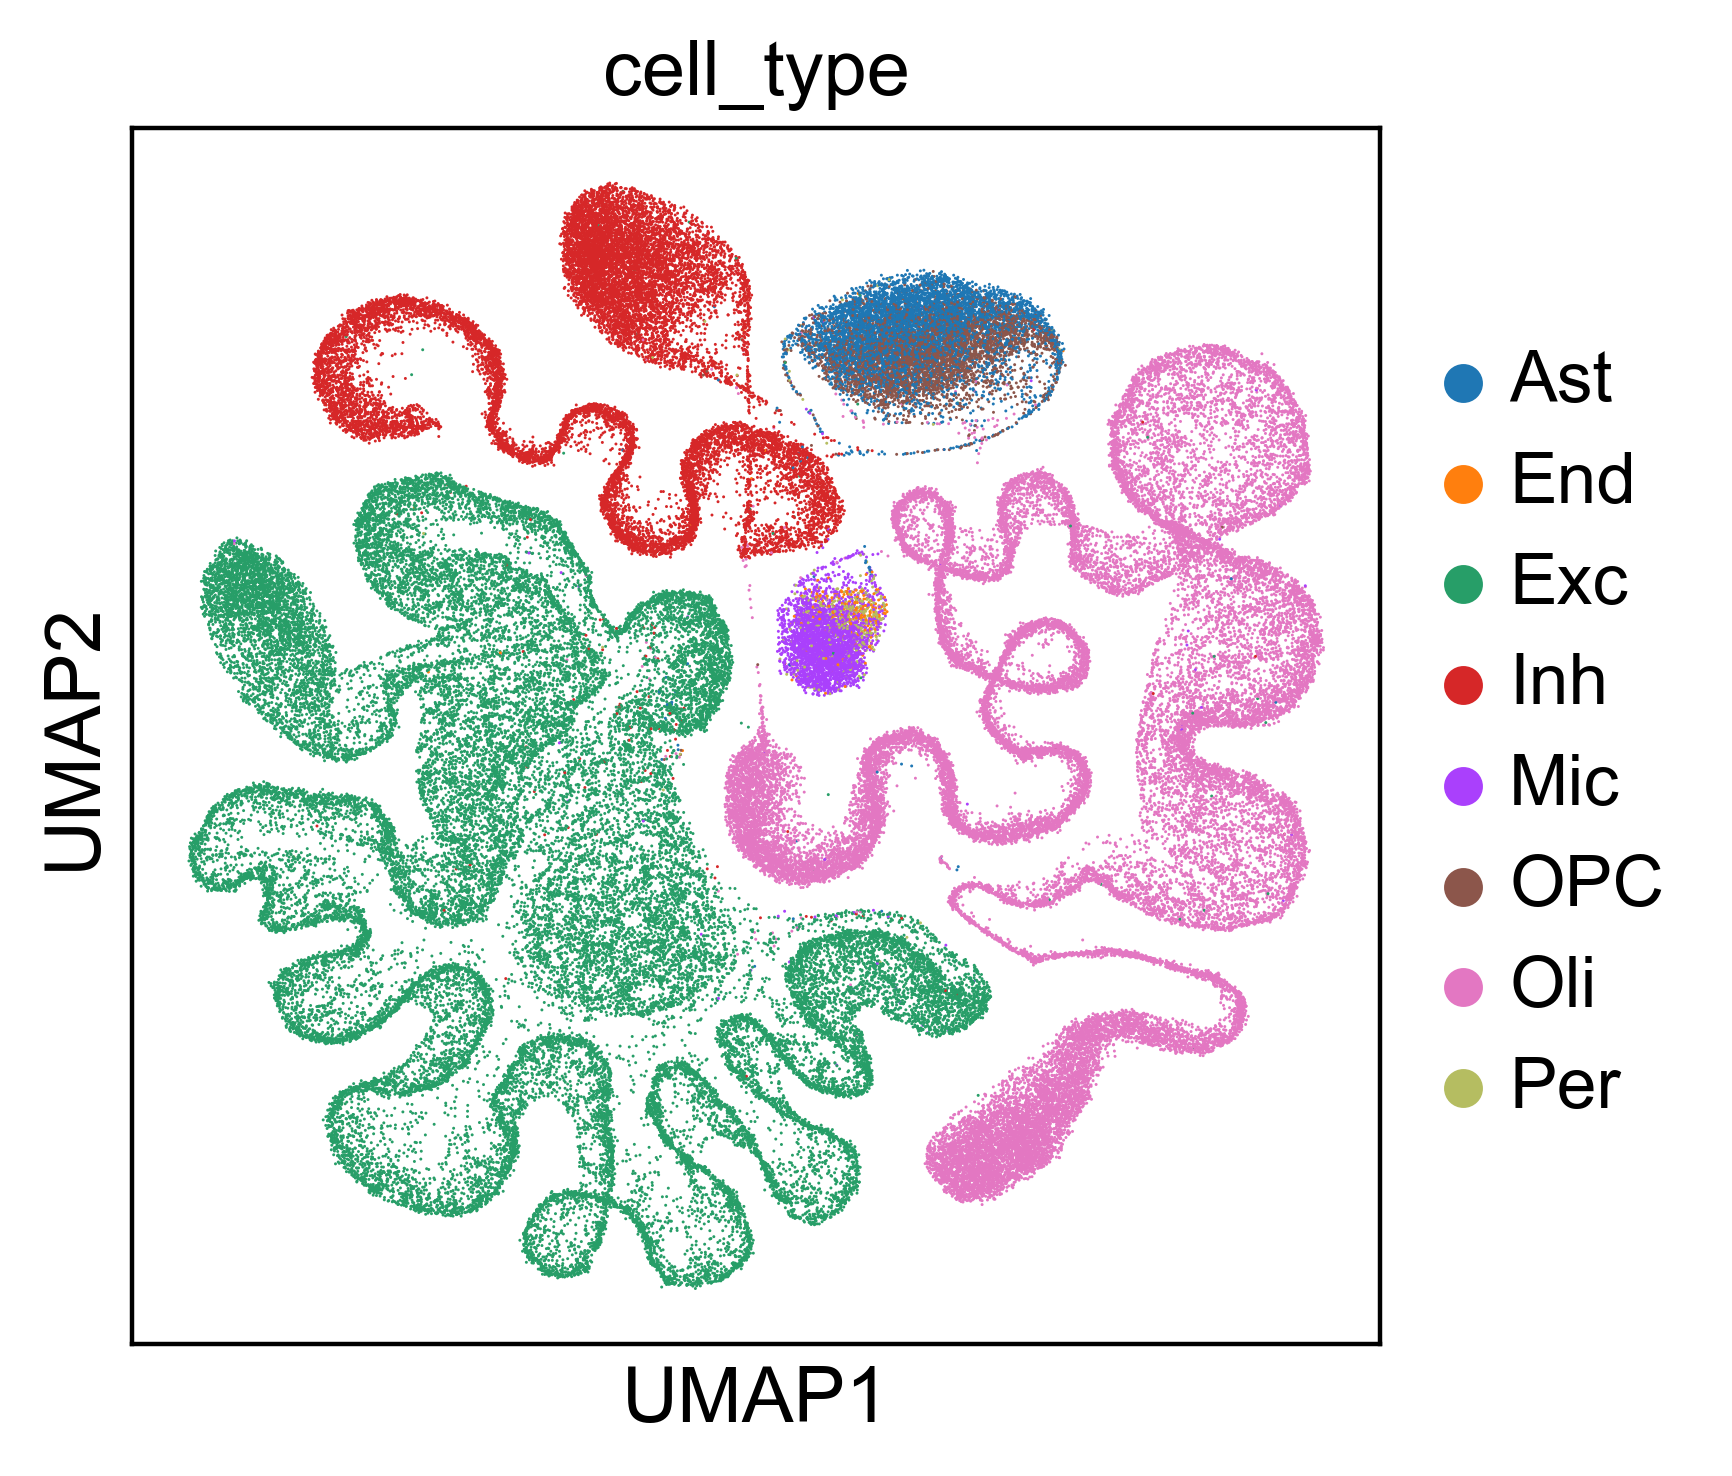

In [4]:
out_dir = "images"
sc.settings.figdir = out_dir
plot_umap(rna_adata, color="cell_type", metric="cosine", save="_rna.png")

/home/zyuan/.local/share/virtualenvs/scCLIPenvs-NuI542pl/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


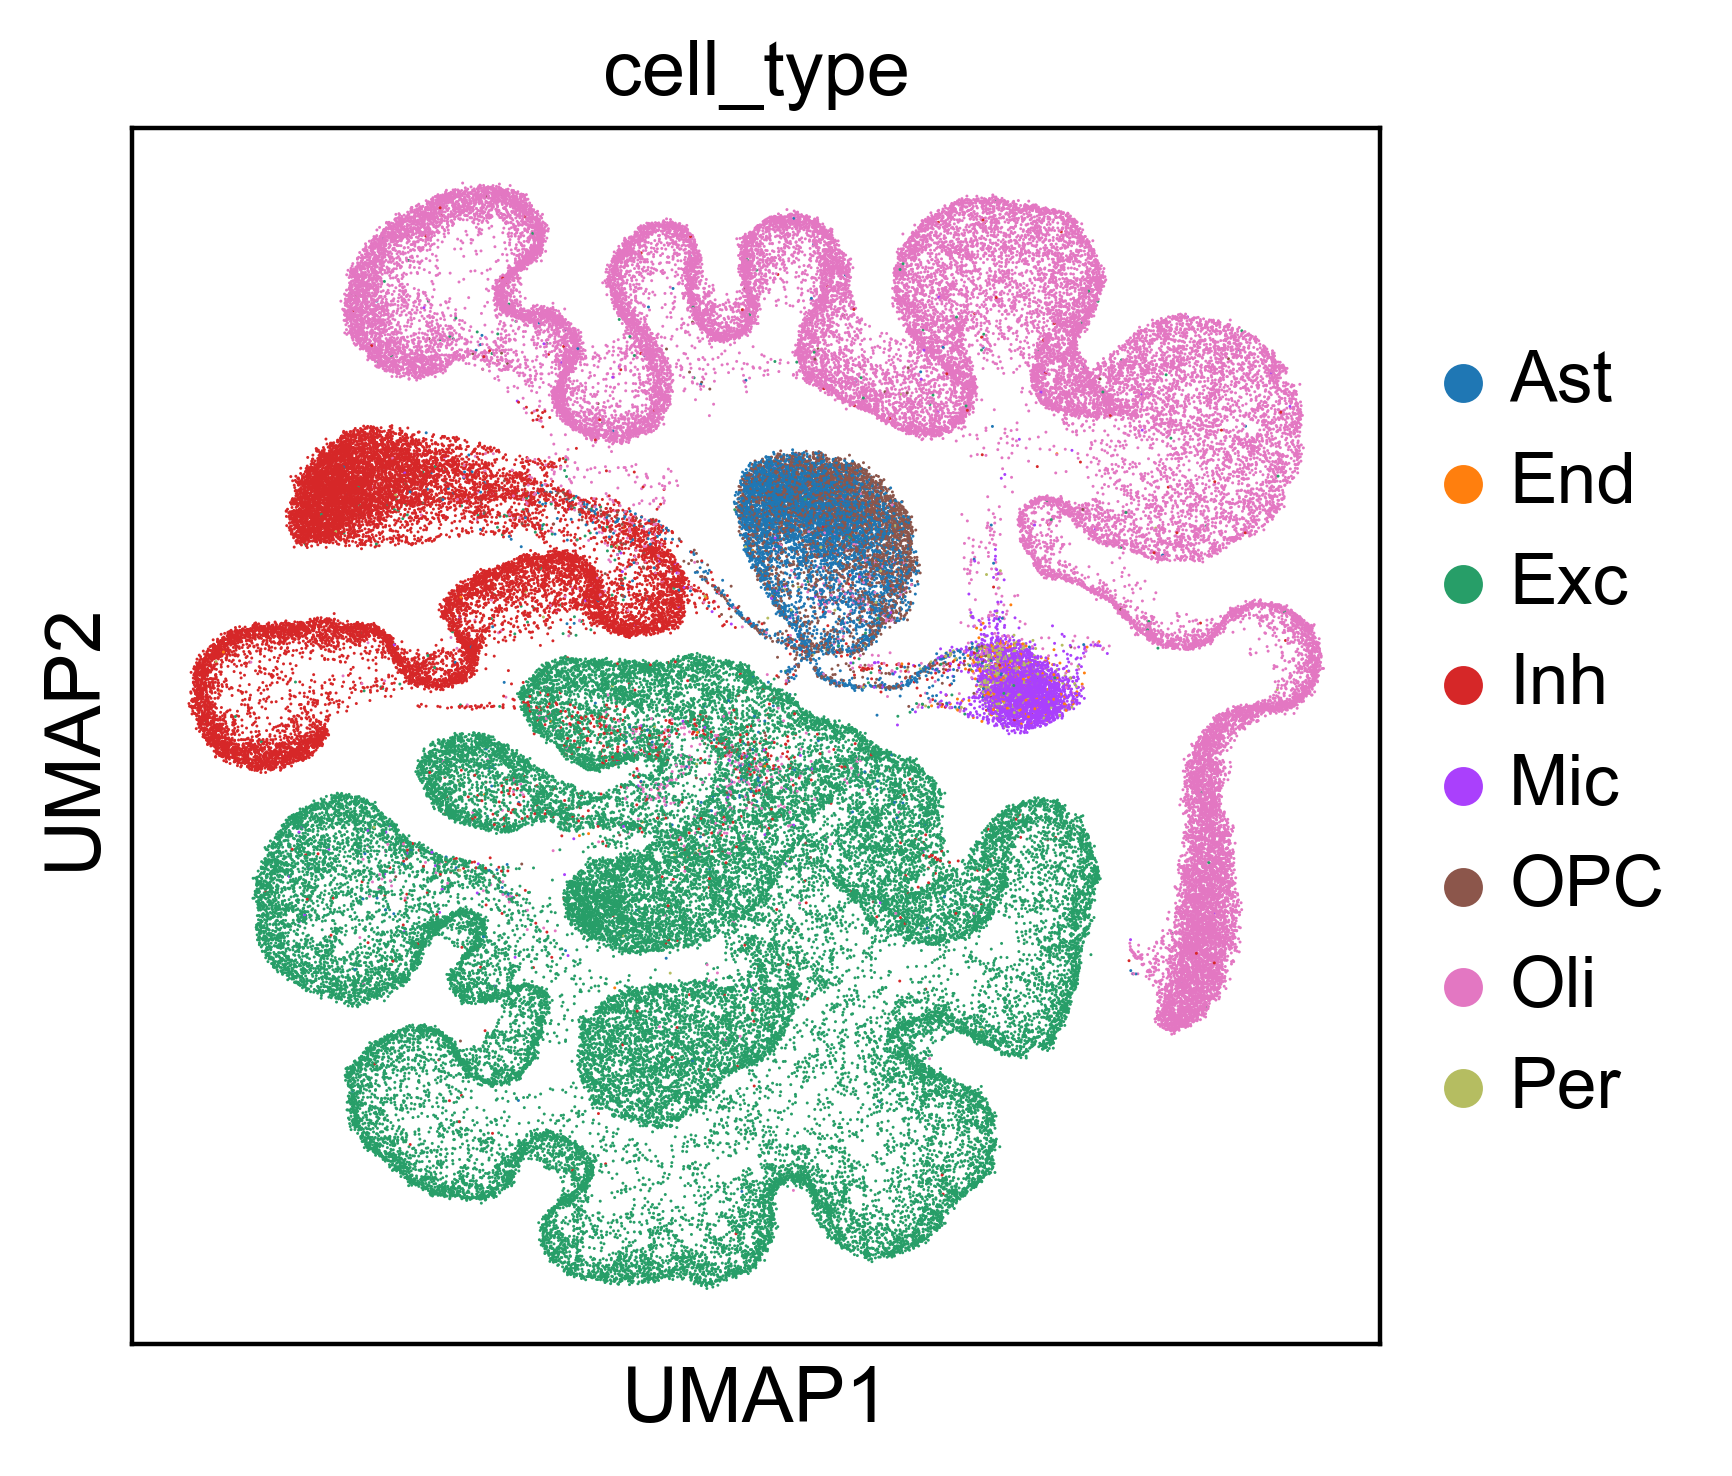

In [5]:
out_dir = "images"
sc.settings.figdir = out_dir
plot_umap(atac_adata, color="cell_type", metric="cosine", save="_atac.png")

In [6]:
rna_adata

AnnData object with n_obs × n_vars = 105332 × 128
    obs: 'rna:cell_type', 'atac:cell_type', 'cell_type', 'leiden'
    uns: 'neighbors', 'leiden', 'umap', 'cell_type_colors'
    obsm: 'X_umap'
    obsp: 'distances', 'connectivities'

In [8]:
rna_adata.write("images/rna_adata.h5ad")
atac_adata.write("images/atac_adata.h5ad")

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [10]:
original_labels = rna_adata.obs['cell_type'].values
cluster_labels = rna_adata.obs['leiden'].values
label_encoder = LabelEncoder()
encoded_original_labels = label_encoder.fit_transform(original_labels)

In [11]:
# 计算聚类评价指标
silhouette_avg = metrics.silhouette_score(rna_adata.X, cluster_labels)
ari_score = metrics.adjusted_rand_score(encoded_original_labels, cluster_labels)
nmi_score = metrics.normalized_mutual_info_score(encoded_original_labels, cluster_labels)

print("Silhouette Score:", silhouette_avg)
print("Adjusted Rand Index (ARI):", ari_score)
print("Normalized Mutual Information (NMI):", nmi_score)

Silhouette Score: 0.5231983
Adjusted Rand Index (ARI): 0.12204248583814069
Normalized Mutual Information (NMI): 0.5232995575960409
